<a href="https://colab.research.google.com/github/ElnazDi/Time-Series-Analysis-Python/blob/main/Analysis_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please refer to the project report

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 300)

In [ ]:
print(plt.style.available)
plt.style.use('seaborn-white')




['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
covid_19_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_19_data= pd.read_csv(covid_19_url)
covid_19_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975,42033,42092,42297,42463,42609
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953


Iran One and Growth

In [ ]:
Iran_covid_19 = covid_19_data[(covid_19_data['Country/Region'] == 'Iran')]
Iran_covid_19.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20
145,NaN,Iran,32.427908,53.688046,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,...,468119,471772,475674,479825,483844,488236,492378,496253,500075,504281,508389,513219,517835,522387,526490,530380,534631,539670,545286,550757,556891,562705,568896,574856,581824,588648,596941,604952,612772,620491,628780,637712,646164,654936,663800,673250,682486,692949,703288,715068


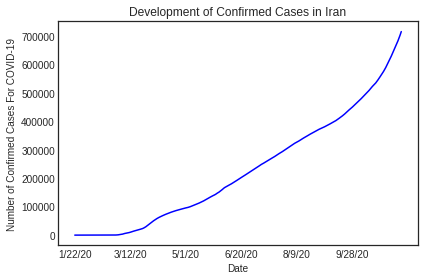

In [ ]:
Iran_covid_19 = Iran_covid_19[(Iran_covid_19['Country/Region'] == 'Iran')]
by_date = Iran_covid_19.sum(axis=0).filter(like='/20')
by_date.plot(title='Development of Confirmed Cases in Iran' % Iran_covid_19, color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases For COVID-19')
plt.tight_layout()
plt.show()

In [ ]:
growth_rate_Iran = Iran_covid_19.sum(axis=0).filter(like='/20').to_frame().pct_change() + 1
growth_rate_Iran.ewm(span=5).mean() 
growth_rate_Iran.reset_index(inplace=True)
growth_rate_Iran.rename(columns={'index':'date', 0: 'rate'}, inplace=True)
growth_rate_Iran = growth_rate_Iran.iloc[29:,:]
growth_rate_Iran



,date,rate
29,2/20/20,2.500000
30,2/21/20,3.600000
31,2/22/20,1.555556
32,2/23/20,1.535714
33,2/24/20,1.418605
34,2/25/20,1.557377
35,2/26/20,1.463158
36,2/27/20,1.762590
37,2/28/20,1.583673
38,2/29/20,1.528351


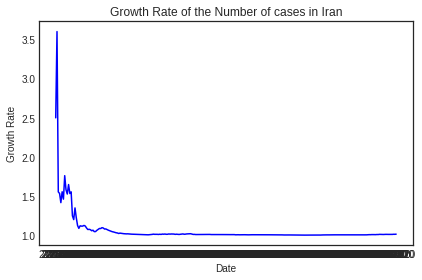

In [ ]:
x_axis= growth_rate_Iran['date']
y_axis= growth_rate_Iran['rate']
plt.plot(x_axis, y_axis, color='blue')
plt.title('Growth Rate of the Number of cases in Iran')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.tight_layout()
plt.show()




In [ ]:
last_7_days = Iran_covid_19[['11/2/20','11/3/20','11/4/20','11/5/20','11/6/20','11/7/20','11/8/20','11/9/20']]
growth_rate_7_days = last_7_days.sum(axis=0).filter(like='/20').to_frame().pct_change() + 1
growth_rate_7_days.ewm(span=5).mean() 
growth_rate_7_days.reset_index(inplace=True)
growth_rate_7_days.rename(columns={'index':'date', 0: 'rate'}, inplace=True)
growth_rate_7_days


,date,rate
0,11/2/20,NaN
1,11/3/20,1.014205
2,11/4/20,1.013254
3,11/5/20,1.013576
4,11/6/20,1.013534
5,11/7/20,1.014236
6,11/8/20,1.013719
7,11/9/20,1.015331


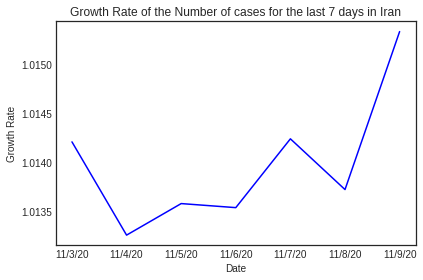

In [ ]:
x_axis= growth_rate_7_days['date']
y_axis= growth_rate_7_days['rate']
plt.plot(x_axis, y_axis, color='blue')
plt.title('Growth Rate of the Number of cases for the last 7 days in Iran')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.tight_layout()
plt.show()

Germany one and Growth

In [ ]:
Germany_covid_19 = covid_19_data[(covid_19_data['Country/Region'] == 'Germany')]
Germany_covid_19.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20
130,NaN,Germany,51.165691,10.451526,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,...,300027,301573,304673,307127,311137,315941,320495,323463,326309,332850,337314,344487,352107,359802,364664,368671,377068,385591,397922,403874,417350,427808,437698,450258,463419,479621,498354,517736,531790,544346,569598,577131,608611,631172,653992,668114,682624,689146,715693,738094


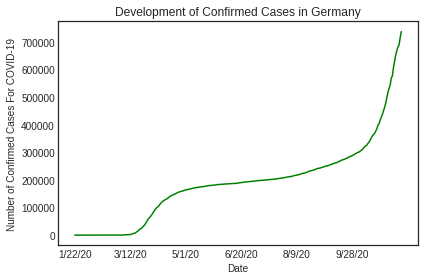

In [ ]:
Germany_covid_19 = covid_19_data[(covid_19_data['Country/Region'] == 'Germany')]
by_date = Germany_covid_19.sum(axis=0).filter(like='/20')
by_date.plot(title='Development of Confirmed Cases in Germany' %Germany_covid_19, color='green')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases For COVID-19')
plt.tight_layout()
plt.show()

In [ ]:
growth_rate_Germany = Germany_covid_19.sum(axis=0).filter(like='/20').to_frame().pct_change() + 1
growth_rate_Germany.ewm(span=5).mean() 
growth_rate_Germany.reset_index(inplace=True)
growth_rate_Germany.rename(columns={'index':'date', 0: 'rate'}, inplace=True)
growth_rate_Germany.iloc[6:,:]


,date,rate
6,1/28/20,4.000000
7,1/29/20,1.000000
8,1/30/20,1.000000
9,1/31/20,1.250000
10,2/1/20,1.600000
11,2/2/20,1.250000
12,2/3/20,1.200000
13,2/4/20,1.000000
14,2/5/20,1.000000
15,2/6/20,1.000000


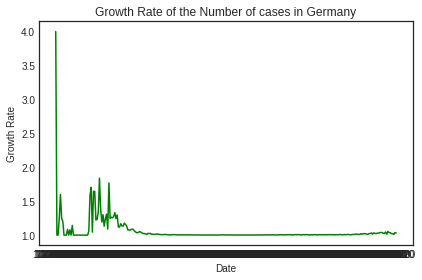

In [ ]:
x_axis= growth_rate_Germany['date']
y_axis= growth_rate_Germany['rate']
plt.plot(x_axis, y_axis, color='green')
plt.title('Growth Rate of the Number of cases in Germany')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.tight_layout()
plt.show()

In [ ]:
last_7_days = Germany_covid_19[['11/2/20','11/3/20','11/4/20','11/5/20','11/6/20','11/7/20','11/8/20','11/9/20']]
growth_rate_7_days_Germany = last_7_days.sum(axis=0).filter(like='/20').to_frame().pct_change() + 1
growth_rate_7_days_Germany.ewm(span=5).mean() 
growth_rate_7_days_Germany.reset_index(inplace=True)
growth_rate_7_days_Germany.rename(columns={'index':'date', 0: 'rate'}, inplace=True)
growth_rate_7_days_Germany

,date,rate
0,11/2/20,NaN
1,11/3/20,1.013225
2,11/4/20,1.054546
3,11/5/20,1.037070
4,11/6/20,1.036155
5,11/7/20,1.021594
6,11/8/20,1.021718
7,11/9/20,1.009554


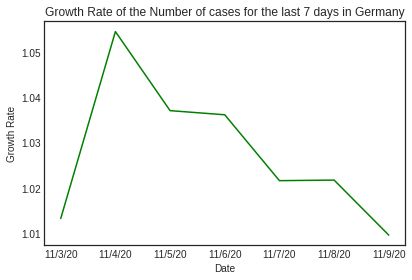

In [ ]:
x_axis= growth_rate_7_days_Germany['date']
y_axis= growth_rate_7_days_Germany['rate']
plt.plot(x_axis, y_axis, color='green')
plt.title('Growth Rate of the Number of cases for the last 7 days in Germany')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.tight_layout()
plt.show()

Begining Approach:

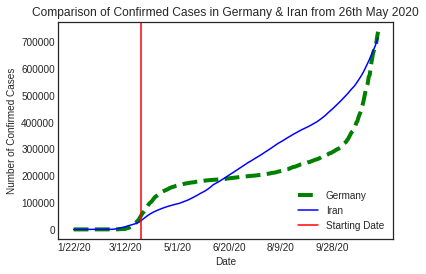

In [ ]:
Germany_covid_19 = covid_19_data[(covid_19_data['Country/Region'] == 'Germany')]
by_date = Germany_covid_19.sum(axis=0).filter(like='/20')
by_date.plot(title='Comparison of Confirmed Cases in Germany & Iran from 26th May 2020' % Germany_covid_19, color='green',linestyle='--',linewidth='4', label='Germany')
Iran_covid_19 = Iran_covid_19[(Iran_covid_19['Country/Region'] == 'Iran')]
by_date = Iran_covid_19.sum(axis=0).filter(like='/20')
by_date.plot(title='' % Iran_covid_19, color='blue', label='Iran')
artificial_date= 65  #Number of dayes: starting from 1/22/20 to 3/26/2020
plt.axvline( artificial_date, color='red', label='Starting Date') #Assumptive Starting Date
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.show()

Only Timeseries:

In [ ]:
Germany_covid_19 = covid_19_data[(covid_19_data['Country/Region'] == 'Germany')]
Germany_covid_19_start_first_case = Germany_covid_19.drop(columns=['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20'])
Germany_covid_19_start_first_case= Germany_covid_19_start_first_case.shift(23, axis = 1)
Germany_covid_19_start_first_case_nan = Germany_covid_19_start_first_case.dropna(axis=1)
Germany_covid_19_start_first_case_nan_dr = Germany_covid_19_start_first_case_nan.drop(columns=['2/16/20', '2/17/20', '2/18/20'])
Germany_covid_19_start_first_case_nan_dr




,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,...,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20
130,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,...,258149,259735,260817,261737,263222,265014,266869,269048,271247,272932,273965,275560,277412,279025,281346,283712,285026,286339,288631,290471,292913,295539,298374,300027,301573,304673,307127,311137,315941,320495,323463,326309,332850,337314,344487,352107,359802,364664,368671,377068


In [ ]:
Iran_covid_19 = covid_19_data[(covid_19_data['Country/Region'] == 'Iran')]
Iran_covid_19_start_first_case = Iran_covid_19.drop(columns=['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20','2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20'])
Iran_covid_19_start_first_case

,Province/State,Country/Region,Lat,Long,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,...,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
145,NaN,Iran,32.427908,53.688046,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991,16169,17361,18407,19644,20610,21638,23049,24811,27017,...,464596,468119,471772,475674,479825,483844,488236,492378,496253,500075,504281,508389,513219,517835,522387,526490,530380,534631,539670,545286,550757,556891,562705,568896,574856,581824,588648,596941,604952,612772,620491,628780,637712,646164,654936,663800,673250,682486,692949,703288


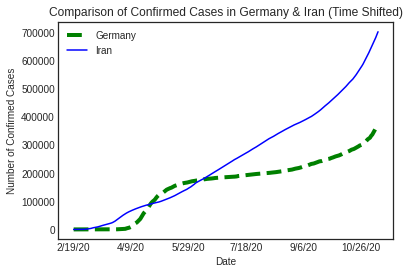

In [ ]:
by_date = Germany_covid_19_start_first_case_nan_dr.sum(axis=0).filter(like='/20')
by_date.plot(title='Comparison of Confirmed Cases in Germany & Iran (Time Shifted)' %Germany_covid_19_start_first_case_nan_dr, color='green',linestyle='--',linewidth='4', label='Germany')
by_date = Iran_covid_19_start_first_case.sum(axis=0).filter(like='/20')
by_date.plot(title='' % Iran_covid_19_start_first_case, color='blue', label='Iran')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.show()

Only Pupulation: (for whole or partial)

In [ ]:

Iran_populatin = 84376663
Germany_population = 83880616

Iran_confirmed_cases=703288
Germany_confirmed_case= 705341

#Iran_confirmed_cases=682486
#Germany_confirmed_case= 672507

Iran_per_100t = (100000 * Iran_confirmed_cases)/Iran_populatin 
print(Iran_per_100t)

Germany_per_100t = (100000 * Germany_confirmed_case) /Germany_population
print(Germany_per_100t)




833.5100903433453
840.8867669736712


In [ ]:
Germany_covid_19 = covid_19_data[(covid_19_data['Country/Region'] == 'Germany')]
cell_Germany = Germany_covid_19.iloc[:, 280:]
cell_Germany
Germany_population = 83880616
Germany_per_100t = (100000 * cell_Germany )/Germany_population
Germany_per_100t




,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
130,510.020098,521.810665,536.784327,552.474483,571.790031,594.122962,617.229611,633.984376,648.953269,679.05796,688.038581,725.56811,752.46467,779.670001,796.505834,813.804229,821.579565,853.228116


In [ ]:
Iran_covid_19 = covid_19_data[(covid_19_data['Country/Region'] == 'Iran')]
cell_Iran = Iran_covid_19.iloc[:, 280:]
cell_Iran
Iran_populatin = 84376663
Iran_per_100t = (100000 * cell_Iran )/Iran_populatin
Iran_per_100t


,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
145,666.896485,674.233822,681.297387,689.555594,697.643139,707.471686,716.966017,726.233982,735.382247,745.206053,755.791918,765.808906,776.205146,786.71042,797.910199,808.856354,821.256702,833.51009


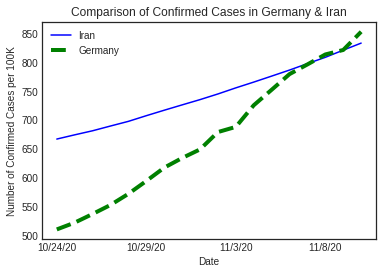

In [ ]:
by_date = Iran_per_100t.sum(axis=0).filter(like='/20')
by_date.plot(title='Comparison of Confirmed Cases in Germany & Iran' %Iran_per_100t, color='blue', label='Iran')
by_date = Germany_per_100t.sum(axis=0).filter(like='/20')
by_date.plot(title='' % Germany_per_100t, color='green',linestyle='--',linewidth='4',label='Germany')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases per 100K')
plt.legend()
plt.show()

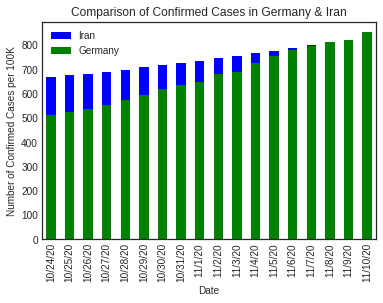

In [ ]:
by_date = Iran_per_100t.sum(axis=0).filter(like='/20')
by_date.plot.bar(title='Comparison of Confirmed Cases in Germany & Iran' %Iran_per_100t, color='blue', label='Iran')
by_date = Germany_per_100t.sum(axis=0).filter(like='/20')
by_date.plot.bar(title='' % Germany_per_100t, color='green',label='Germany')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases per 100K')
plt.legend()
plt.show()

Both timesetries and population: (Done)

In [ ]:
Germany_covid_19 = covid_19_data[(covid_19_data['Country/Region'] == 'Germany')]
Germany_covid_19_start_first_case = Germany_covid_19.drop(columns=['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20'])
Germany_covid_19_start_first_case = Germany_covid_19_start_first_case.shift(23, axis = 1)
Germany_covid_19_start_first_case_nan = Germany_covid_19_start_first_case.dropna(axis=1)
cell_germany_time = Germany_covid_19_start_first_case_nan.drop(columns=['2/16/20', '2/17/20', '2/18/20'])
Germany_population = 83880616
Germany_per_100tt = (100000 * (cell_germany_time.filter(like='/20')) )/Germany_population
Germany_per_100tt




,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,...,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
130,0.001192,0.004769,0.004769,0.004769,0.005961,0.009537,0.011922,0.014306,0.014306,0.014306,0.014306,0.015498,0.015498,0.01669,0.01669,0.019075,0.019075,0.019075,0.019075,0.019075,0.019075,0.019075,0.019075,0.019075,0.019075,0.019075,0.019075,0.019075,0.019075,0.020267,0.032189,0.05484,0.057224,0.094181,0.154982,0.189555,0.233665,0.312349,0.574626,0.798754,...,305.71187,307.757635,309.648417,310.938346,312.035143,313.805516,315.941886,318.153362,320.751102,323.372685,325.381492,326.613004,328.514516,330.722416,332.645387,335.412415,338.233091,339.799603,341.364923,344.097378,346.290971,349.202252,352.332892,355.712695,357.683353,359.526449,363.222178,366.147764,370.928368,376.655555,382.0847,385.623062,389.01598,396.813967,402.135816,410.687256,419.771595,428.945348,434.741681,439.518708


In [ ]:
Iran_covid_19 = covid_19_data[(covid_19_data['Country/Region'] == 'Iran')]
cell_Iran_time = Iran_covid_19.drop(columns=['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20','2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20'])
Iran_populatin = 84376663
Iran_per_100tt = (100000 * (cell_Iran_time.filter(like='/20')) )/Iran_populatin
Iran_per_100tt

,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,...,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
145,0.00237,0.005926,0.021333,0.033185,0.050962,0.072295,0.11259,0.164737,0.290365,0.459843,0.702801,1.159088,1.778928,2.768538,3.463043,4.163473,5.625963,6.901197,7.781773,8.486944,9.531071,10.666456,11.940505,13.468179,15.085925,16.518786,17.766761,19.162882,20.575594,21.815274,23.281319,24.426185,25.644532,27.316795,29.40505,32.019517,34.850869,38.318652,41.96421,45.402364,...,550.621444,554.796769,559.126165,563.750666,568.670273,573.433439,578.638669,583.54761,588.140112,592.6698,597.654591,602.523236,608.247567,613.718274,619.113131,623.97585,628.586129,633.624252,639.596283,646.252151,652.736172,660.005954,666.896485,674.233822,681.297387,689.555594,697.643139,707.471686,716.966017,726.233982,735.382247,745.206053,755.791918,765.808906,776.205146,786.71042,797.910199,808.856354,821.256702,833.51009


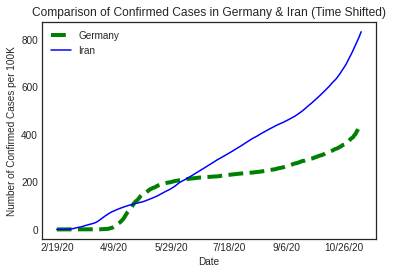

In [ ]:
by_date = Germany_per_100tt.sum(axis=0).filter(like='/20')
by_date.plot(title='Comparison of Confirmed Cases in Germany & Iran (Time Shifted)' %Germany_per_100tt, color='green',linestyle='--',linewidth='4', label='Germany')
by_date = Iran_per_100tt.sum(axis=0).filter(like='/20')
by_date.plot(title='' % Iran_per_100tt, color='blue', label='Iran')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases per 100K')
plt.legend()
plt.show()